In [1]:
from fipy import CellVariable, Grid2D, Matplotlib2DGridContourViewer, ImplicitDiffusionTerm
from fipy.solvers import LinearLUSolver
import gstools as gs

import matplotlib.pyplot as plt
import numpy as np

In [2]:
nx, ny = 30, 30
L = 1.0
dx, dy = L/nx, L/ny
mesh = Grid2D(dx=dx, dy=dy, nx=nx, ny=ny)

In [3]:
p = CellVariable(name='pressure', mesh=mesh, value=0.0)
k = CellVariable(name='permeability', mesh=mesh, value=1.0)
mu = 0.89e-3 # Pa s

x = mesh.cellCenters.numericValue[0]
y = mesh.cellCenters.numericValue[1]

x_face = mesh.faceCenters.numericValue[0]
y_face = mesh.faceCenters.numericValue[1]

In [4]:
x, y = range(nx), range(ny)
variance = 3.0
model = gs.Gaussian(dim=2, var=variance, len_scale=[5.0, 7.0])
srf = gs.SRF(model)
lnk = srf((x, y), mesh_type='structured')

In [5]:
lnk -= variance
k.numericValue[:] = np.exp(lnk.flatten())

In [6]:
# set boundary conditions
p.constrain(0.0, mesh.facesRight)
p.constrain(1.0, mesh.facesLeft)

In [7]:
k_face = k.harmonicFaceValue

eq = ImplicitDiffusionTerm(coeff=k_face)
eq.solve(var=p, solver=LinearLUSolver(tolerance=1e-13, iterations=100, precon='jacobi'))

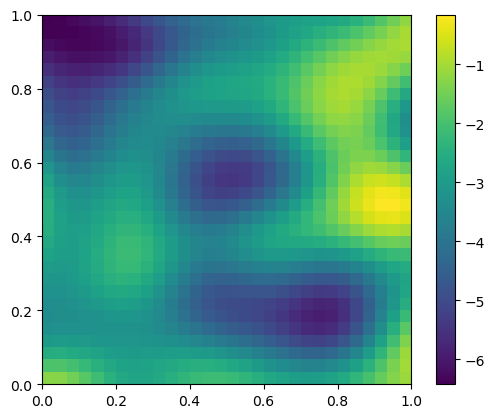

In [8]:
plt.figure()
plt.imshow(lnk, origin='lower', extent=[0,1,0,1])
plt.colorbar()
plt.show()

In [9]:
u = -k_face/mu*p.faceGrad.numericValue[0]
v = -k_face/mu*p.faceGrad.numericValue[1]

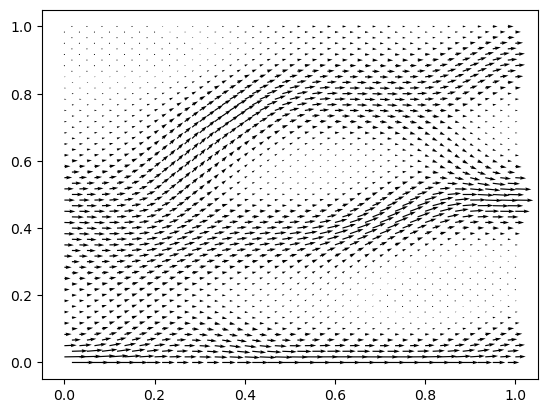

In [10]:
plt.figure()
plt.quiver(x_face, y_face, u, v)
plt.show()

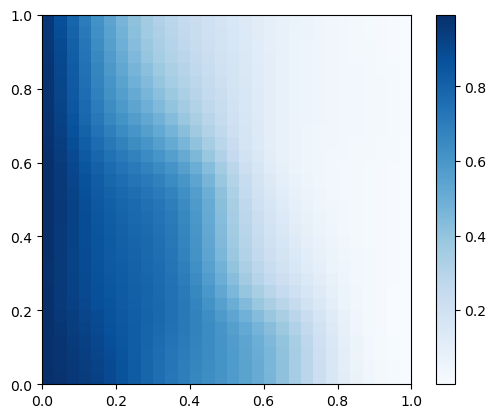

In [11]:
plt.figure()
plt.imshow(p.numericValue.reshape(nx, ny), origin='lower', cmap='Blues', extent=[0, 1, 0, 1])
plt.colorbar()
plt.show()

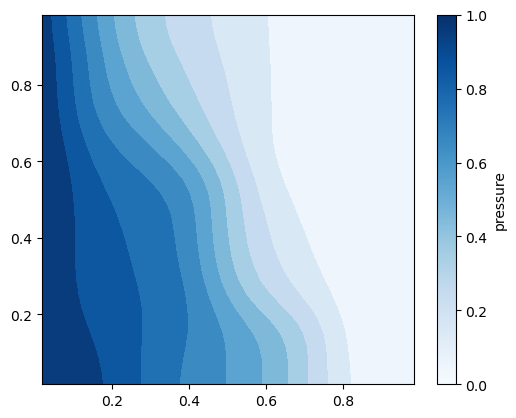

In [12]:
view = Matplotlib2DGridContourViewer(p, datamin=0.0, datamax=1.0, levels=10, cmap='Blues')